In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import matplotlib.font_manager as mfm

# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

# matplotlib 스타일 지정
mpl.style.use('bmh')
# mpl.style.use('seaborn-whitegrid')
style = plt.style.library['bmh']
# 스타일 컬러를 쉽게 쓸 수 있도록 리스트 저장
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

# 그림을 컬러로 출력하고 싶으면 True로 수정
g_color = False

# 그림을 로컬 폴더에 저장하고 싶으면 True로 수정 
file_print = False

import warnings
warnings.filterwarnings("ignore")

In [4]:
D1 = np.array([[1.0, 1.2, 3, 4, 5, 6], [1.7, 3, 2.3, 5.3, 3.8, 5.5]]) # 점 6개 데이터 x, y
D2 = np.array([[-0.6, 1.0, 1.2, 3, 4, 5, 6], [2.9, 1.7, 3, 2.3, 5.3, 3.8, 5.5]]) # D1 제일 왼쪽에 점 하나 더 추가된 데이터

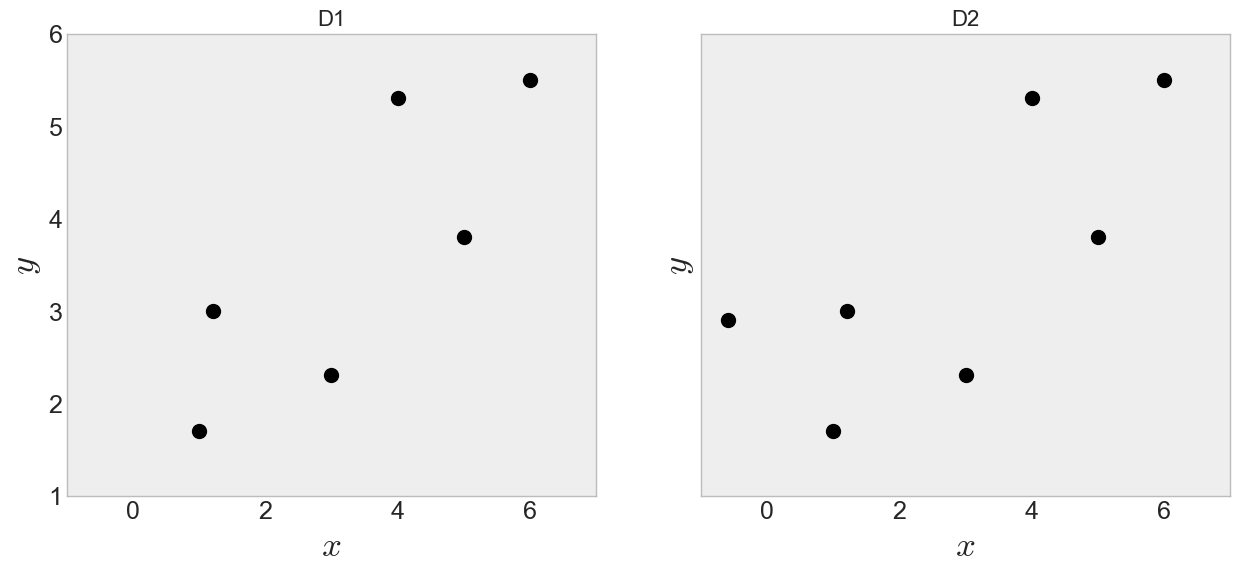

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True)
fig.set_size_inches((15, 6))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)

ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)

ax1.plot(D1[0], D1[1], 'ko', markersize=10)
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.set_title('D1', fontsize=16)

ax2.plot(D2[0], D2[1], 'ko', markersize=10)
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.set_title('D2', fontsize=16)

plt.show()

In [21]:
def machine_learning(D):
    '''
    선형회귀 알고리즘으로 최적의 직선 계산
    '''
    N = D.shape[1] # 데이터의 개수(열) 할당

    # 1열에 1, 2열에 데이터의 x좌표를 가지는 행렬 만들기
    X = np.c_[np.ones(N), D[0]]
    y = D[1]

    # 직선의 계수 구하기
    w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
    return w

def f(x, w):
    '''주어진 w를 사용하여 직선 f(x) = x[1]*x + w[0]의 값 계산
    '''
    return w[1]*x + w[0]

In [22]:
machine_learning(D1)
machine_learning(D2)

array([2.2568, 0.444 ])

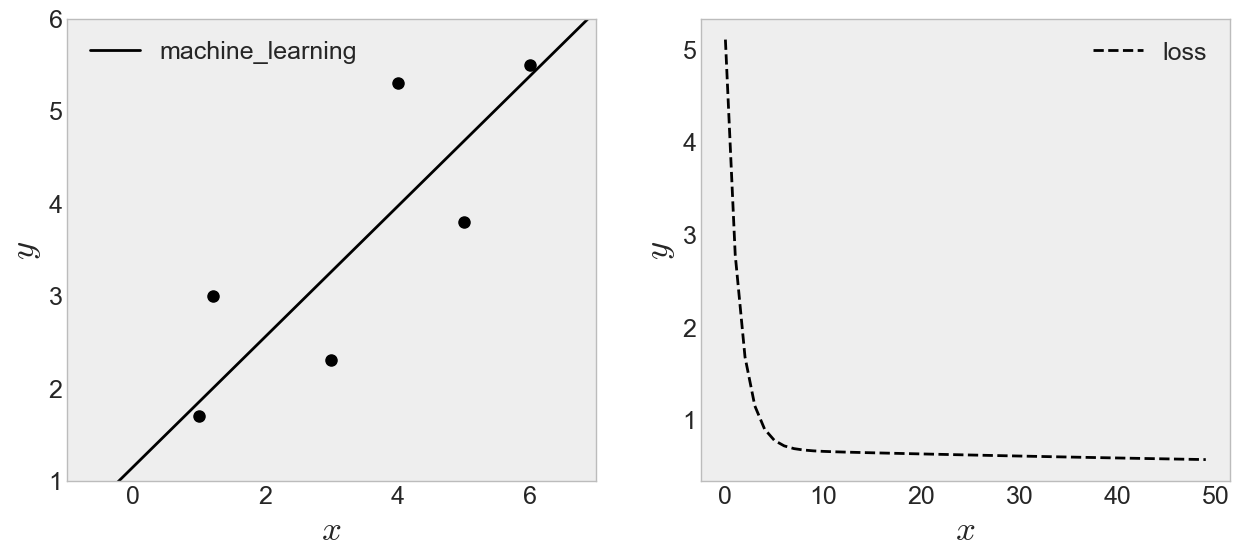

In [36]:
# 150번 반복해서 선을 그리면서 점차 최적의 선을 찾아가는 과정
num_iters = 350
eta = 0.02

np.random.seed(2)
w = np.random.randn(2)
N = D1.shape[1]

ws, L = [], []

X = np.c_[np.ones(N), D1[0]]
y = D1[1]

# 
for i in range(num_iters):
    c = (1/N) * X.T @ (X @ w - y) # gradient
    w -= eta * c # w에서 오차의 그레디언트를 빼서 w 업데이트
    # print(w)
    ws.append(w)

    # loss 계산
    L.append(((X @ w - y)**2).sum()/(2*N))

x = np.linspace(-1, 7, 100)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches((15, 6))

ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax1.set_xlabel('$x$', fontsize=25)
ax1.set_ylabel('$y$', fontsize=25)
ax1.grid(False)
    
ax2.xaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)
ax2.set_xlabel('$x$', fontsize=25)
ax2.set_ylabel('$y$', fontsize=25)
ax2.grid(False)

ax1.plot(D1[0], D1[1], 'ko', markersize = 8)
ax1.plot(x, f(x, w), c='k', lw=2, label="machine_learning")
ax1.set_xlim([-1, 7])
ax1.set_ylim([1, 6])
ax1.legend(fontsize=18)

ax2.plot(L[:50], '--', c='k', label="loss") # 50번 반복까지만 그림
ax2.legend(fontsize=18)

plt.show()

In [26]:
ws

[array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.6421, 0.822 ]),
 array([0.64